In [4]:
import pandas as pd
import os

In [6]:
movies = pd.read_csv('MovieRatings.csv')

In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [16]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [18]:
#convert variable types
movies['Film'] = movies['Film'].astype('category')

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Film                       559 non-null    category
 1   Genre                      559 non-null    object  
 2   Rotten Tomatoes Ratings %  559 non-null    int64   
 3   Audience Ratings %         559 non-null    int64   
 4   Budget (million $)         559 non-null    int64   
 5   Year of release            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [22]:
movies['Genre'] = movies['Genre'].astype('category')
movies['Year of release'] = movies['Year of release'].astype('category')

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Film                       559 non-null    category
 1   Genre                      559 non-null    category
 2   Rotten Tomatoes Ratings %  559 non-null    int64   
 3   Audience Ratings %         559 non-null    int64   
 4   Budget (million $)         559 non-null    int64   
 5   Year of release            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [26]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
# joint plots

In [30]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [31]:
# rename the columns name
movies.rename(columns={'Rotten Tomatoes Ratings %': 'CriticRating', 'Audience Ratings %': 'AudienceRating','Budget (million $)':'Budget'}, inplace=True)

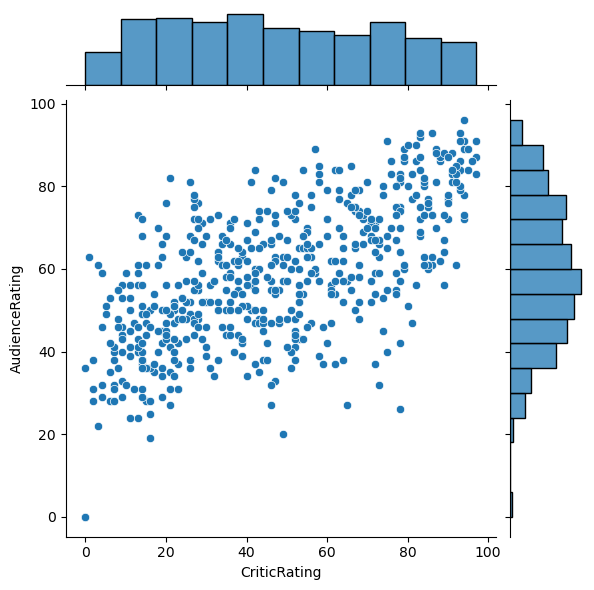

In [32]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='scatter')

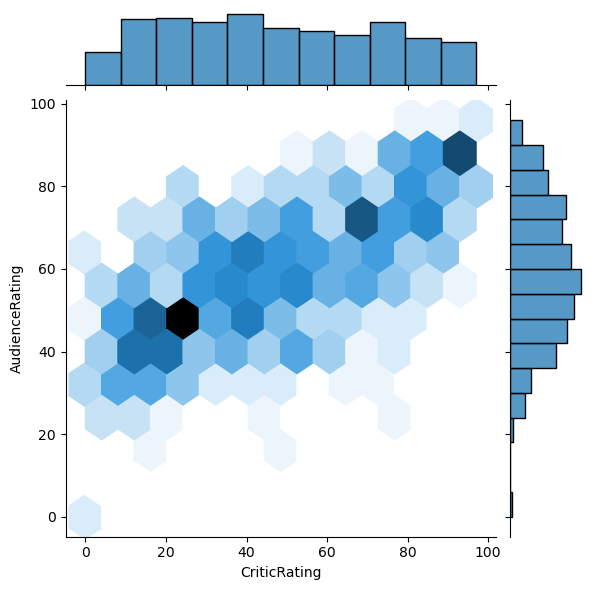

In [33]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex',)

---

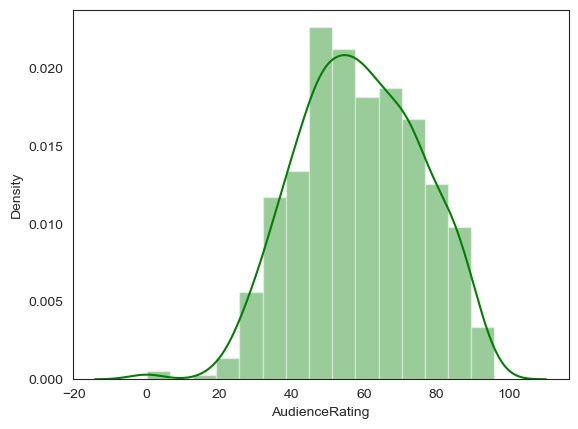

In [41]:
#Histograms
sns.set_style('white')

m1 = sns.distplot(movies.AudienceRating, bins = 15,    color= 'Green')

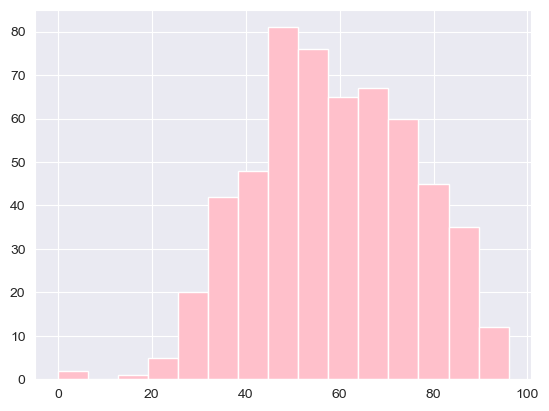

In [43]:
sns.set_style('darkgrid')
m3 = plt.hist(movies.AudienceRating, bins = 15,    color= 'Pink')

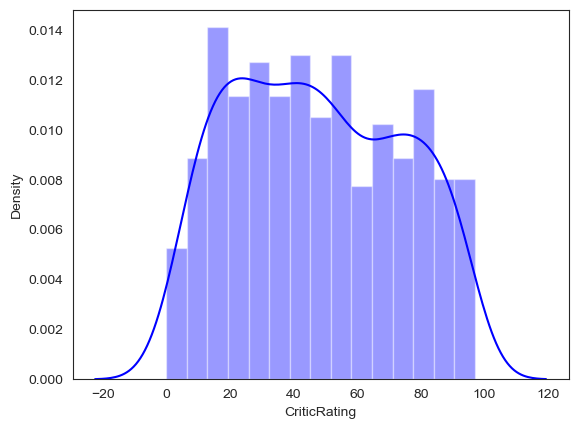

In [45]:
sns.set_style('white')
m2 = sns.distplot(movies.CriticRating, bins = 15,    color= 'Blue')

---

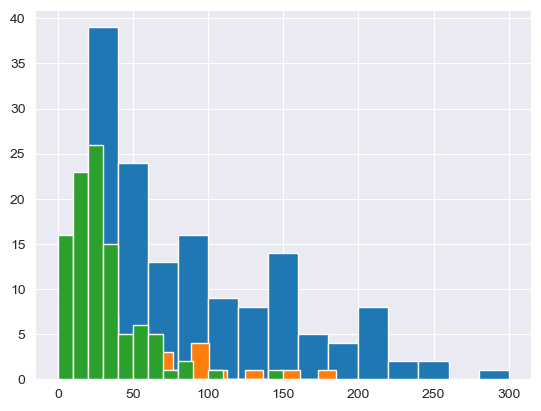

In [48]:
#Stacked histograms
sns.set_style('darkgrid')
plt.hist(movies[movies.Genre == 'Action'].Budget, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].Budget, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].Budget, bins = 15)

plt.show()

In [50]:
plt.hist([movies[movies.Genre == 'Drama'].Budget,
         movies[movies.Genre == 'Thriller'].Budget,
         bins == 15, stacked=True])
plt.show

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1787718515.py, line 3)

(array([[ 39.,  41.,  11.,   6.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [ 43.,  55.,  15.,  11.,   4.,   5.,   1.,   2.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.],
        [ 91., 117.,  43.,  29.,  16.,   8.,   1.,   2.,   1.,   1.,   0.,
           0.,   0.,   0.,   0.],
        [100., 156.,  67.,  42.,  32.,  17.,   9.,  16.,   6.,   5.,   8.,
           2.,   2.,   0.,   1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 4 BarContainer objects>)

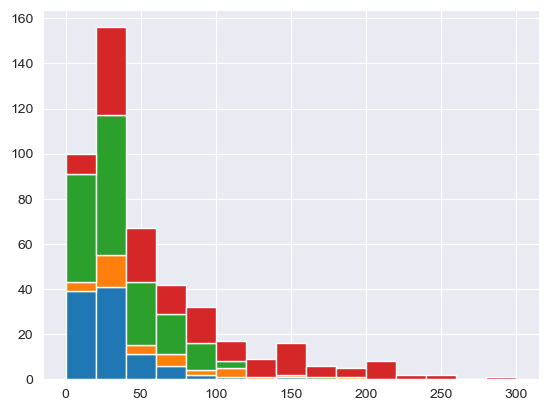

In [52]:
plt.hist([movies[movies['Genre'] == 'Drama']['Budget'],
          movies[movies['Genre'] == 'Thriller']['Budget'],
          movies[movies['Genre'] == 'Comedy']['Budget'],
          movies[movies['Genre'] == 'Action']['Budget']],
          bins=15, stacked=True)

In [54]:
for gen  in movies.Genre.cat.categories:
     print (gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


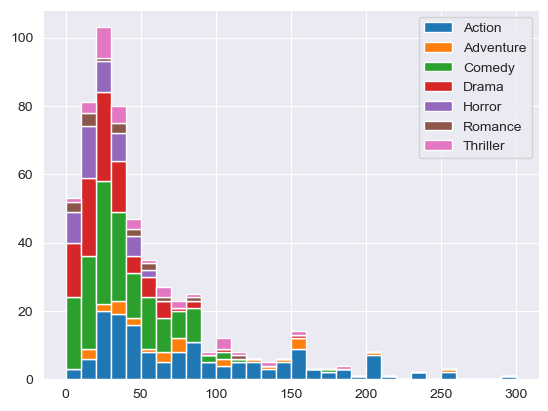

In [56]:
list1 = []
mylabels = []

for gen in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre'] == gen]['Budget'])
    mylabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---

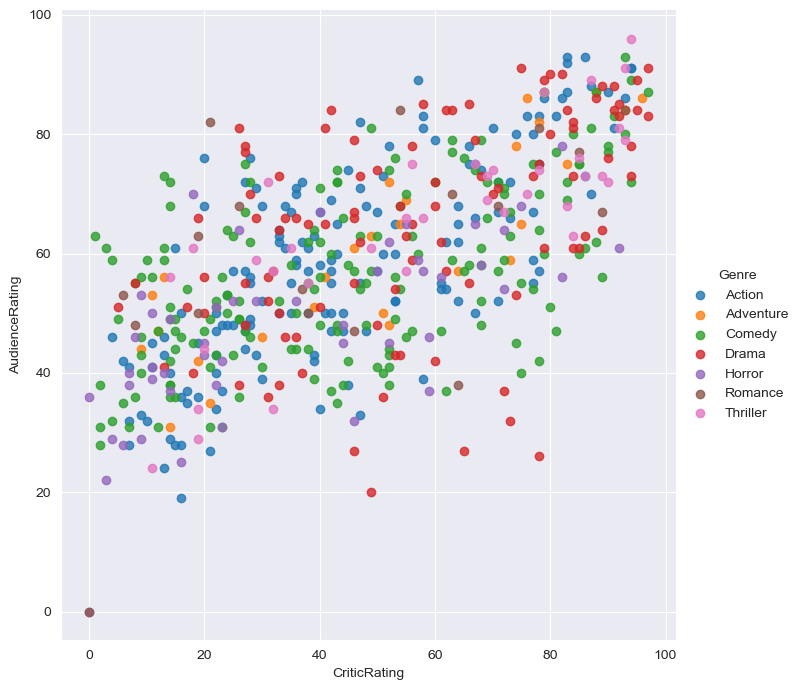

In [61]:
#KDE  plot
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=7, aspect=1)

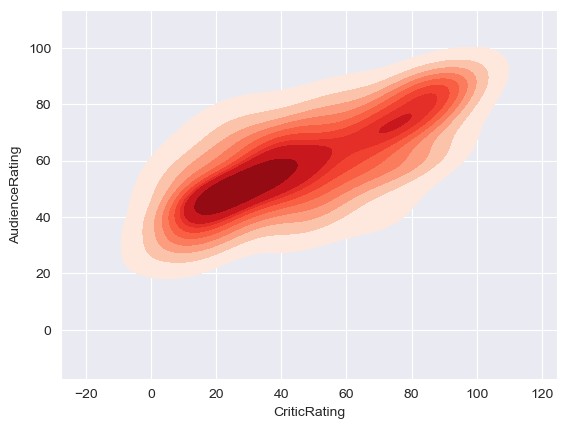

In [97]:
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,
                 shade = True , shade_lowest = False,cmap='Reds' )

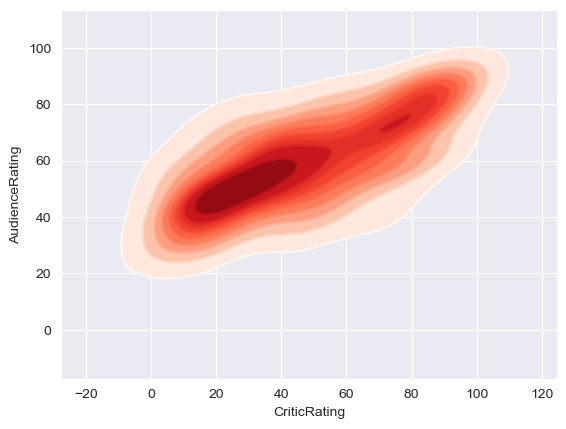

In [104]:
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,
                 shade = True , shade_lowest = False,cmap='Reds' )
k1b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,cmap='Reds' )

---

In [109]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,Budget,Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


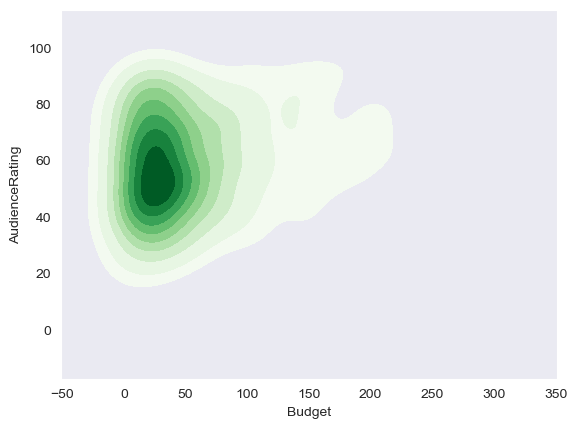

In [133]:
#working with subplots() , more sophisticated and combine visulization
sns.set_style("dark")
k1 =sns.kdeplot(x=movies.Budget, y=movies.AudienceRating, shade = True , shade_lowest = False,cmap='Greens' )

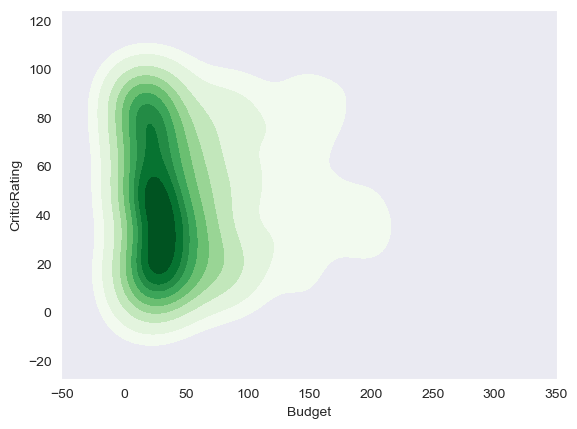

In [144]:
k2=sns.kdeplot(x=movies.Budget, y=movies.CriticRating, shade = True , shade_lowest = False,cmap='Greens' )

[(-20.0, 160.0)]

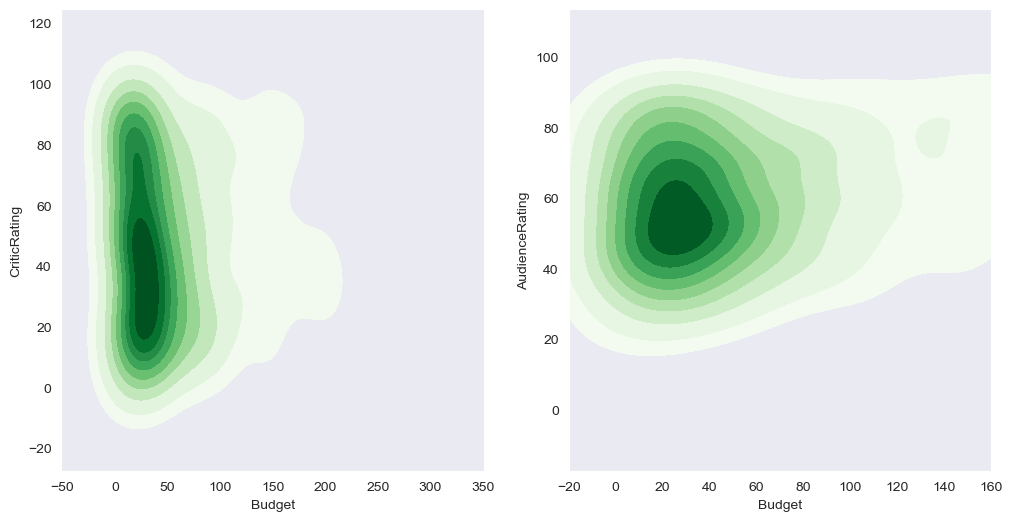

In [183]:
f,axes = plt.subplots(1,2, figsize = (12,6))
k2 =sns.kdeplot(x=movies.Budget, y=movies.CriticRating, shade = True , shade_lowest = False,cmap='Greens' , ax=axes[0]),
k1 =sns.kdeplot(x=movies.Budget, y=movies.AudienceRating, shade = True , shade_lowest = False,cmap='Greens' , ax=axes[1])
k1.set(xlim=(-20,160))

---

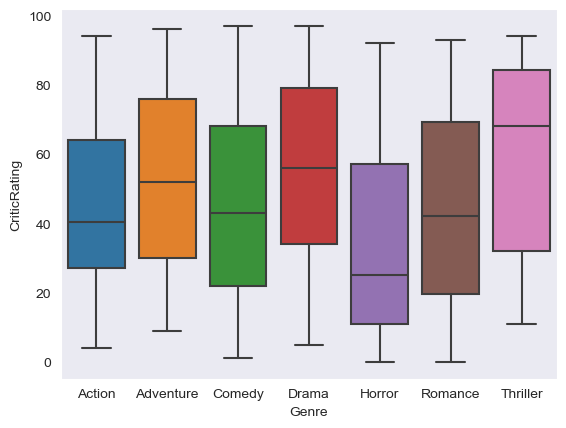

In [177]:
#violinplots and boxplots
w = sns.boxplot(data=movies, x= 'Genre' , y= 'CriticRating')

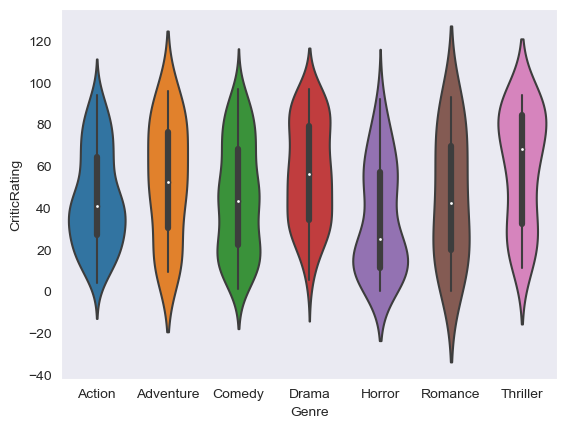

In [235]:
x = sns.violinplot(data=movies, x= 'Genre' , y= 'CriticRating')

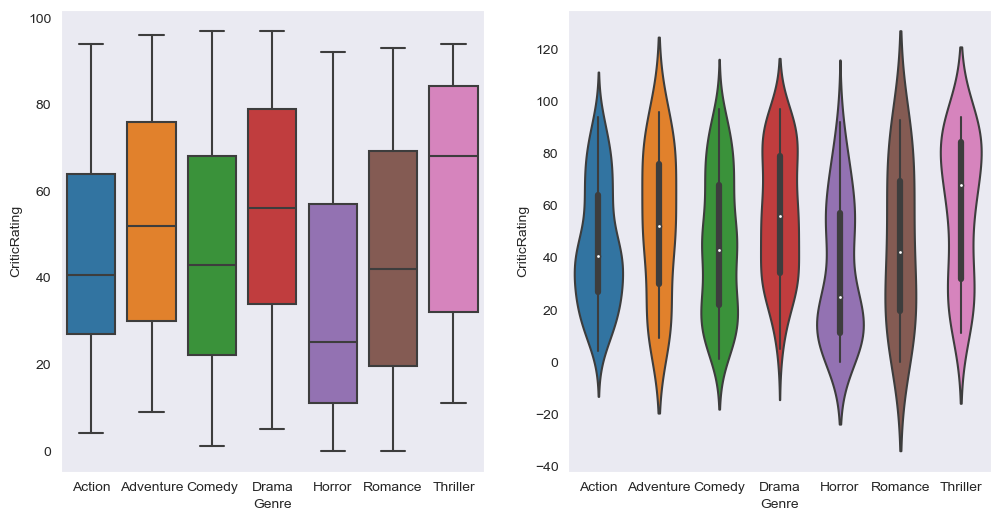

In [217]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
w = sns.boxplot(data=movies, x='Genre', y='CriticRating', ax=axes[0])
x = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1])
plt.savefig('chart.png')

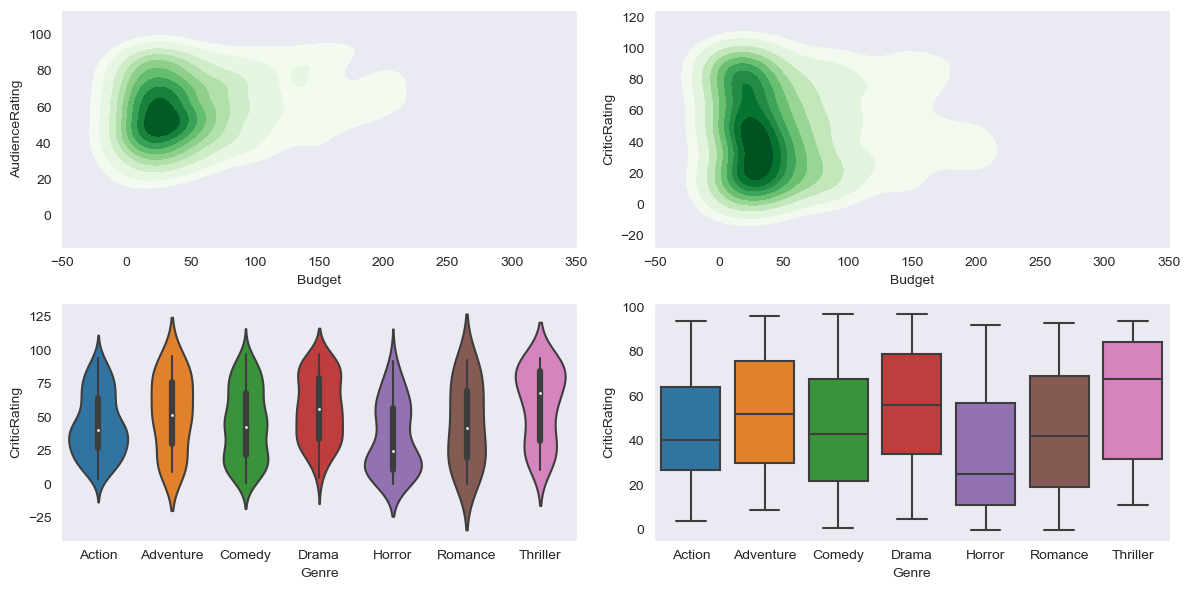

In [219]:

f, axes = plt.subplots(2, 2, figsize=(12, 6))
w = sns.boxplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 1])
x = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 0])
k2 = sns.kdeplot(x=movies.Budget, y=movies.CriticRating, shade=True, shade_lowest=False, cmap='Greens', ax=axes[0, 1])
k1 = sns.kdeplot(x=movies.Budget, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Greens', ax=axes[0, 0])

plt.tight_layout()
plt.show()

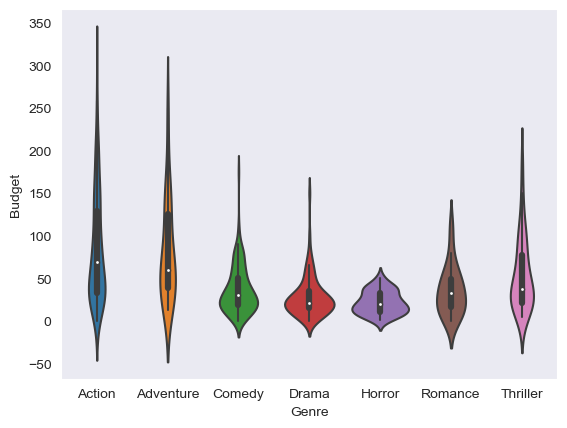

In [225]:
x = sns.violinplot(data=movies, x= 'Genre' , y= 'Budget')
plt.savefig('chart.png')  # Save as a PNG file


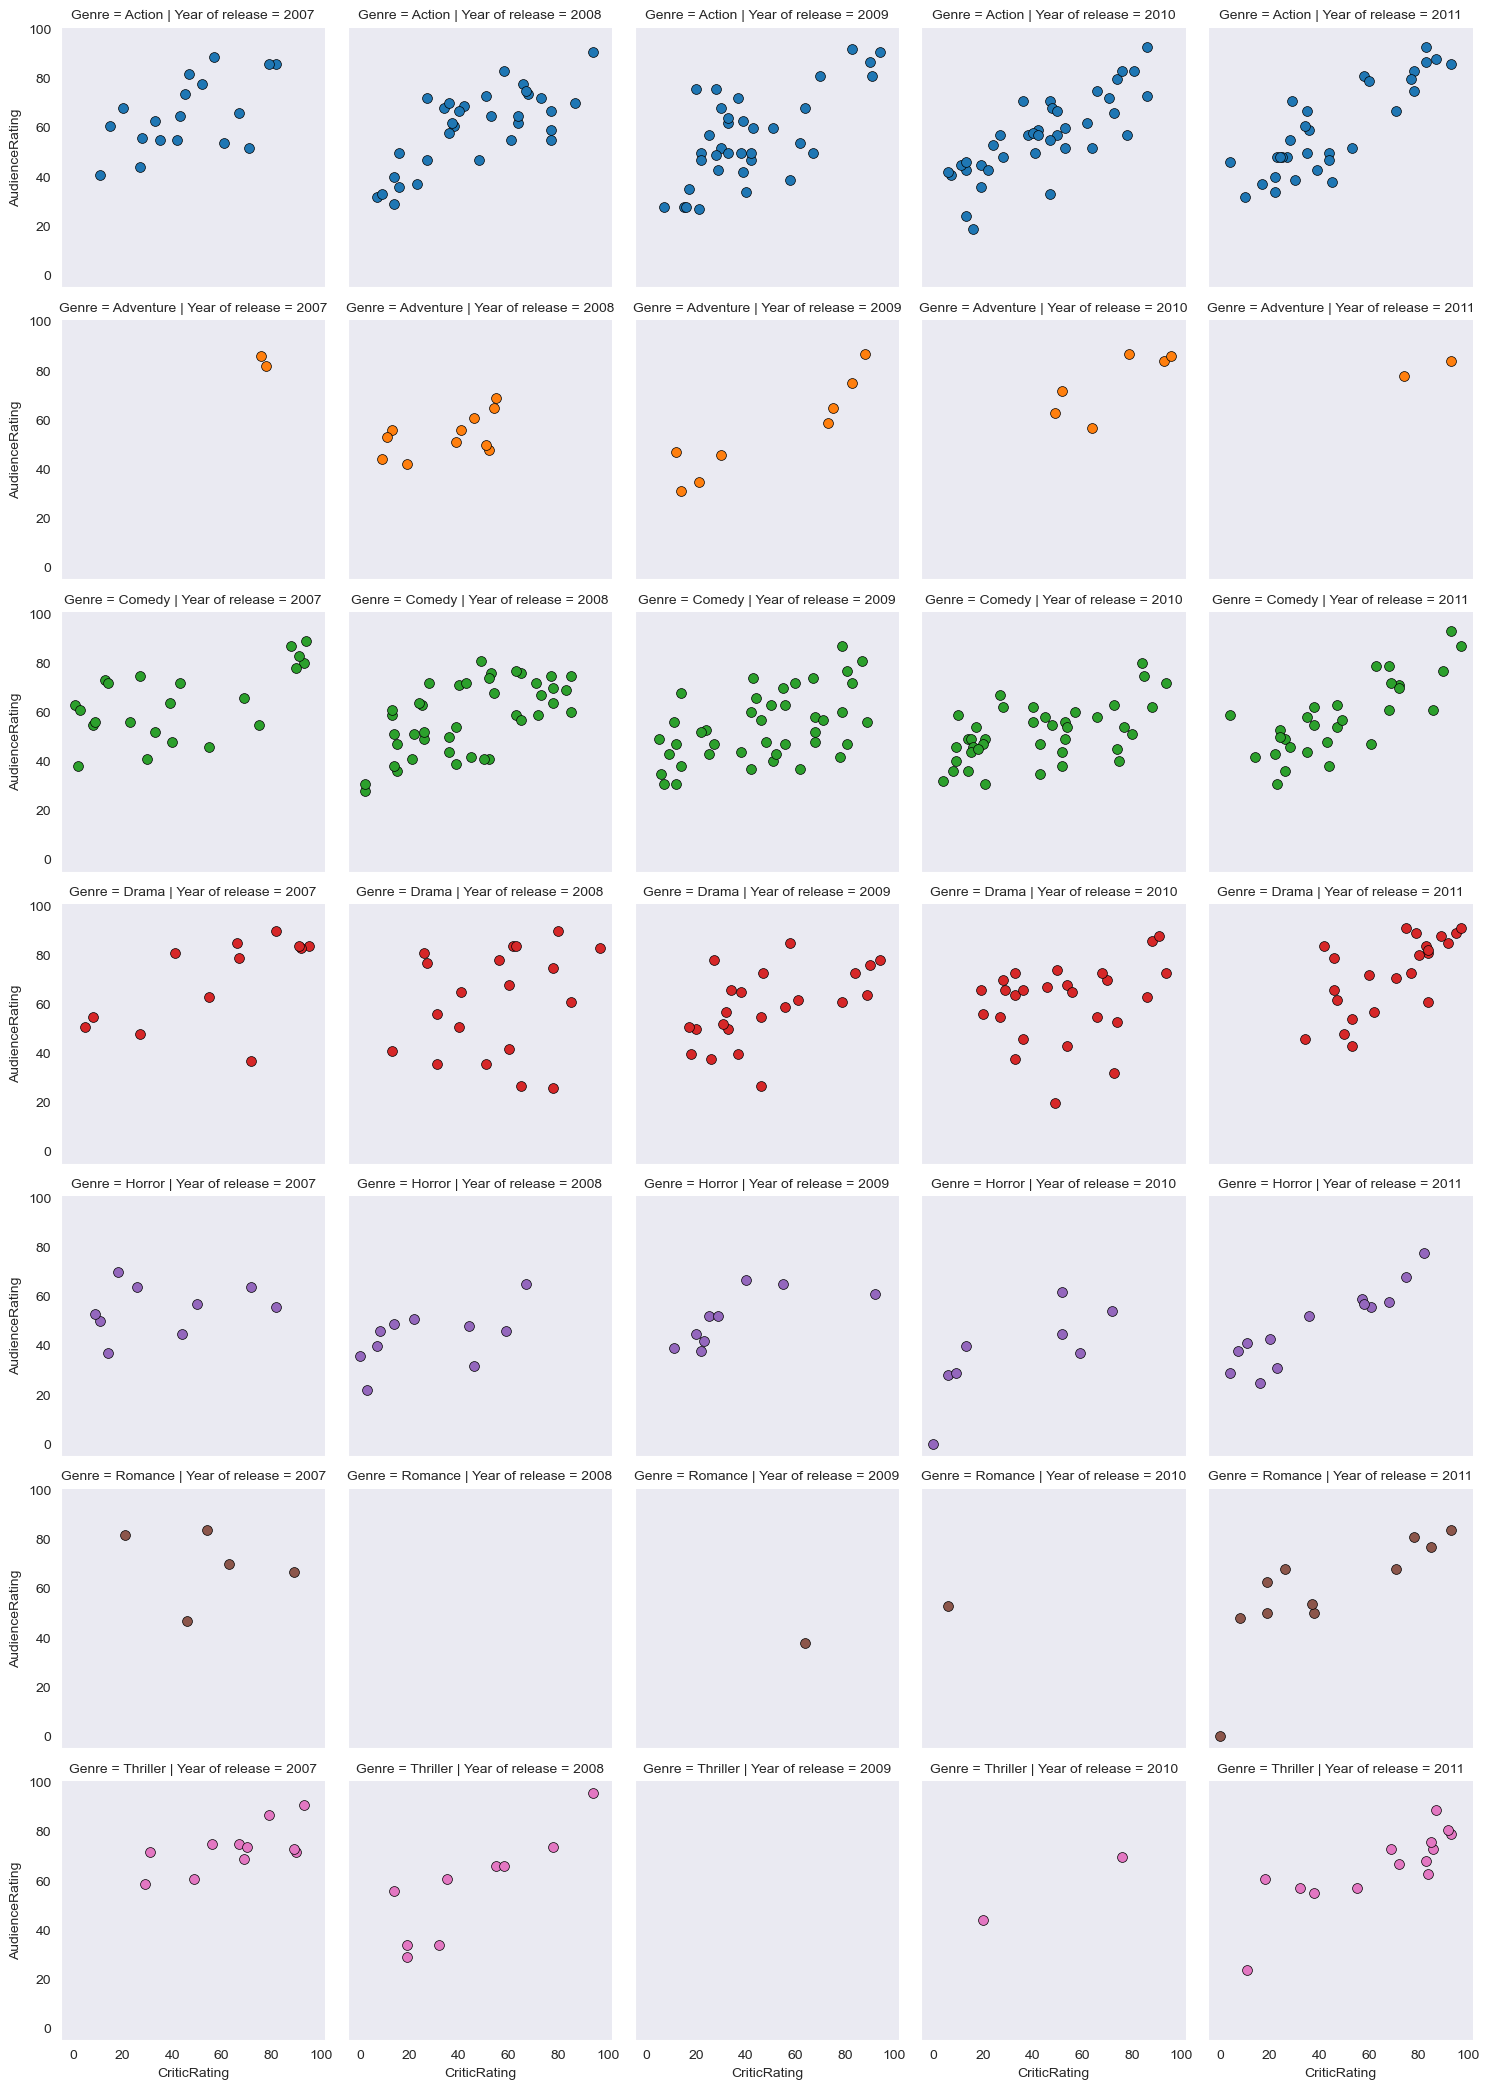

In [251]:
# create a facid grid
g = sns.FacetGrid(movies, row='Genre',col ='Year of release', hue= 'Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor ='black')
g = g.map(plt.scatter, 'CriticRating' , 'AudienceRating',**kws)

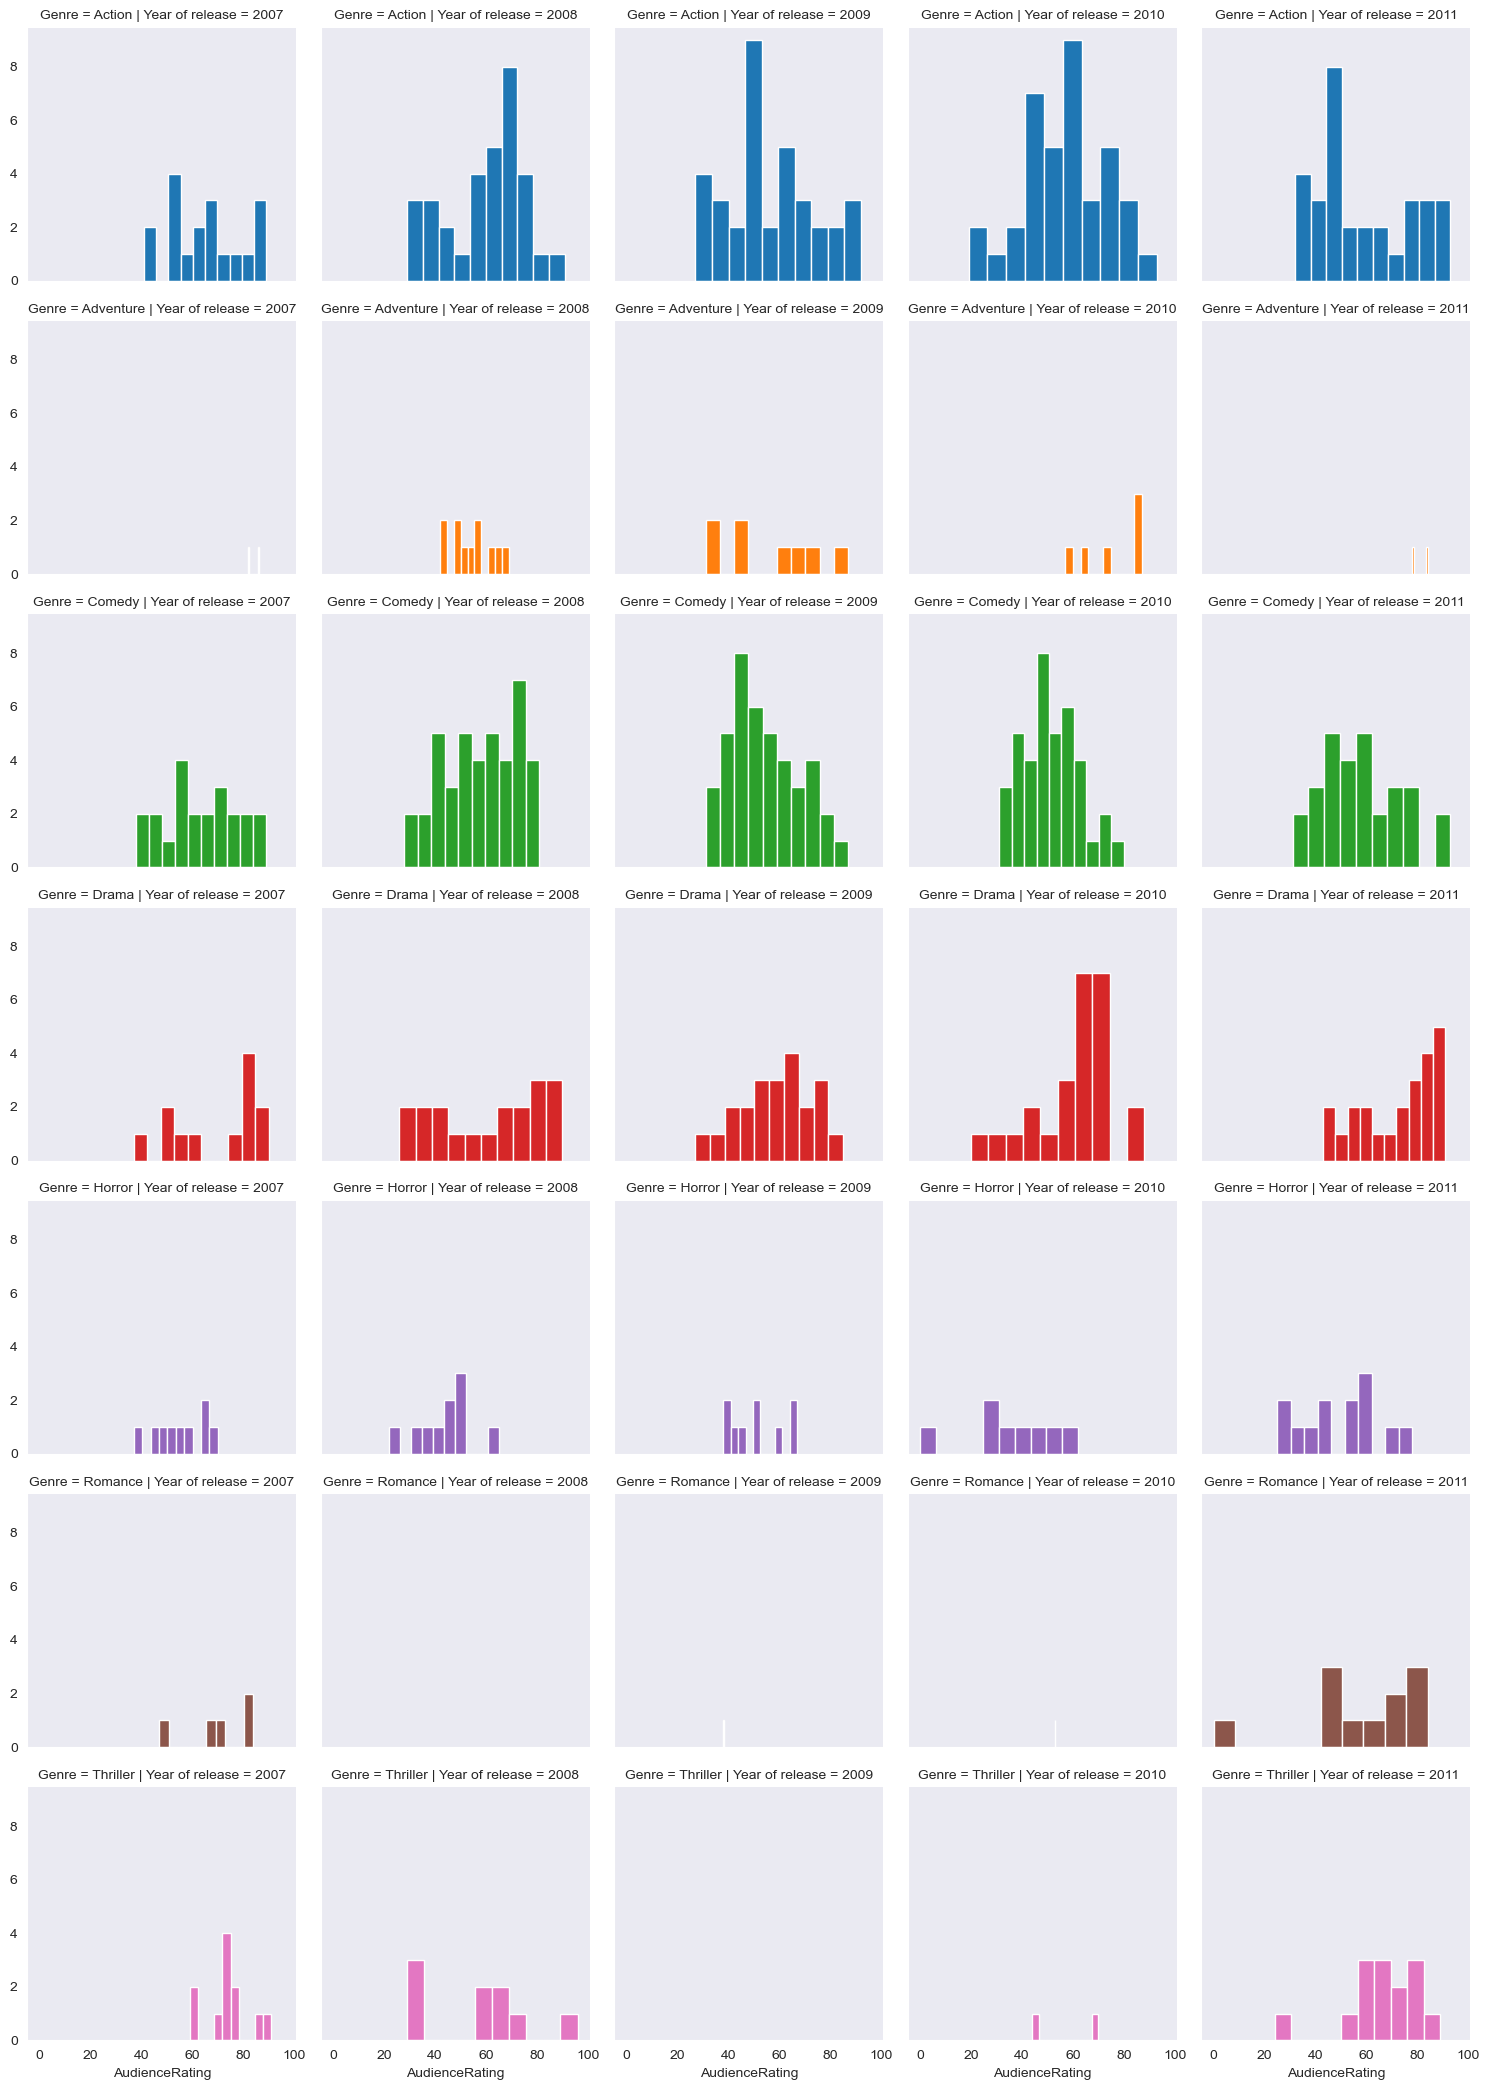

In [241]:
g = sns.FacetGrid(movies, row='Genre',col ='Year of release', hue= 'Genre')
g = g.map(plt.hist, 'AudienceRating')

In [ ]:
# coordinates and diagonals

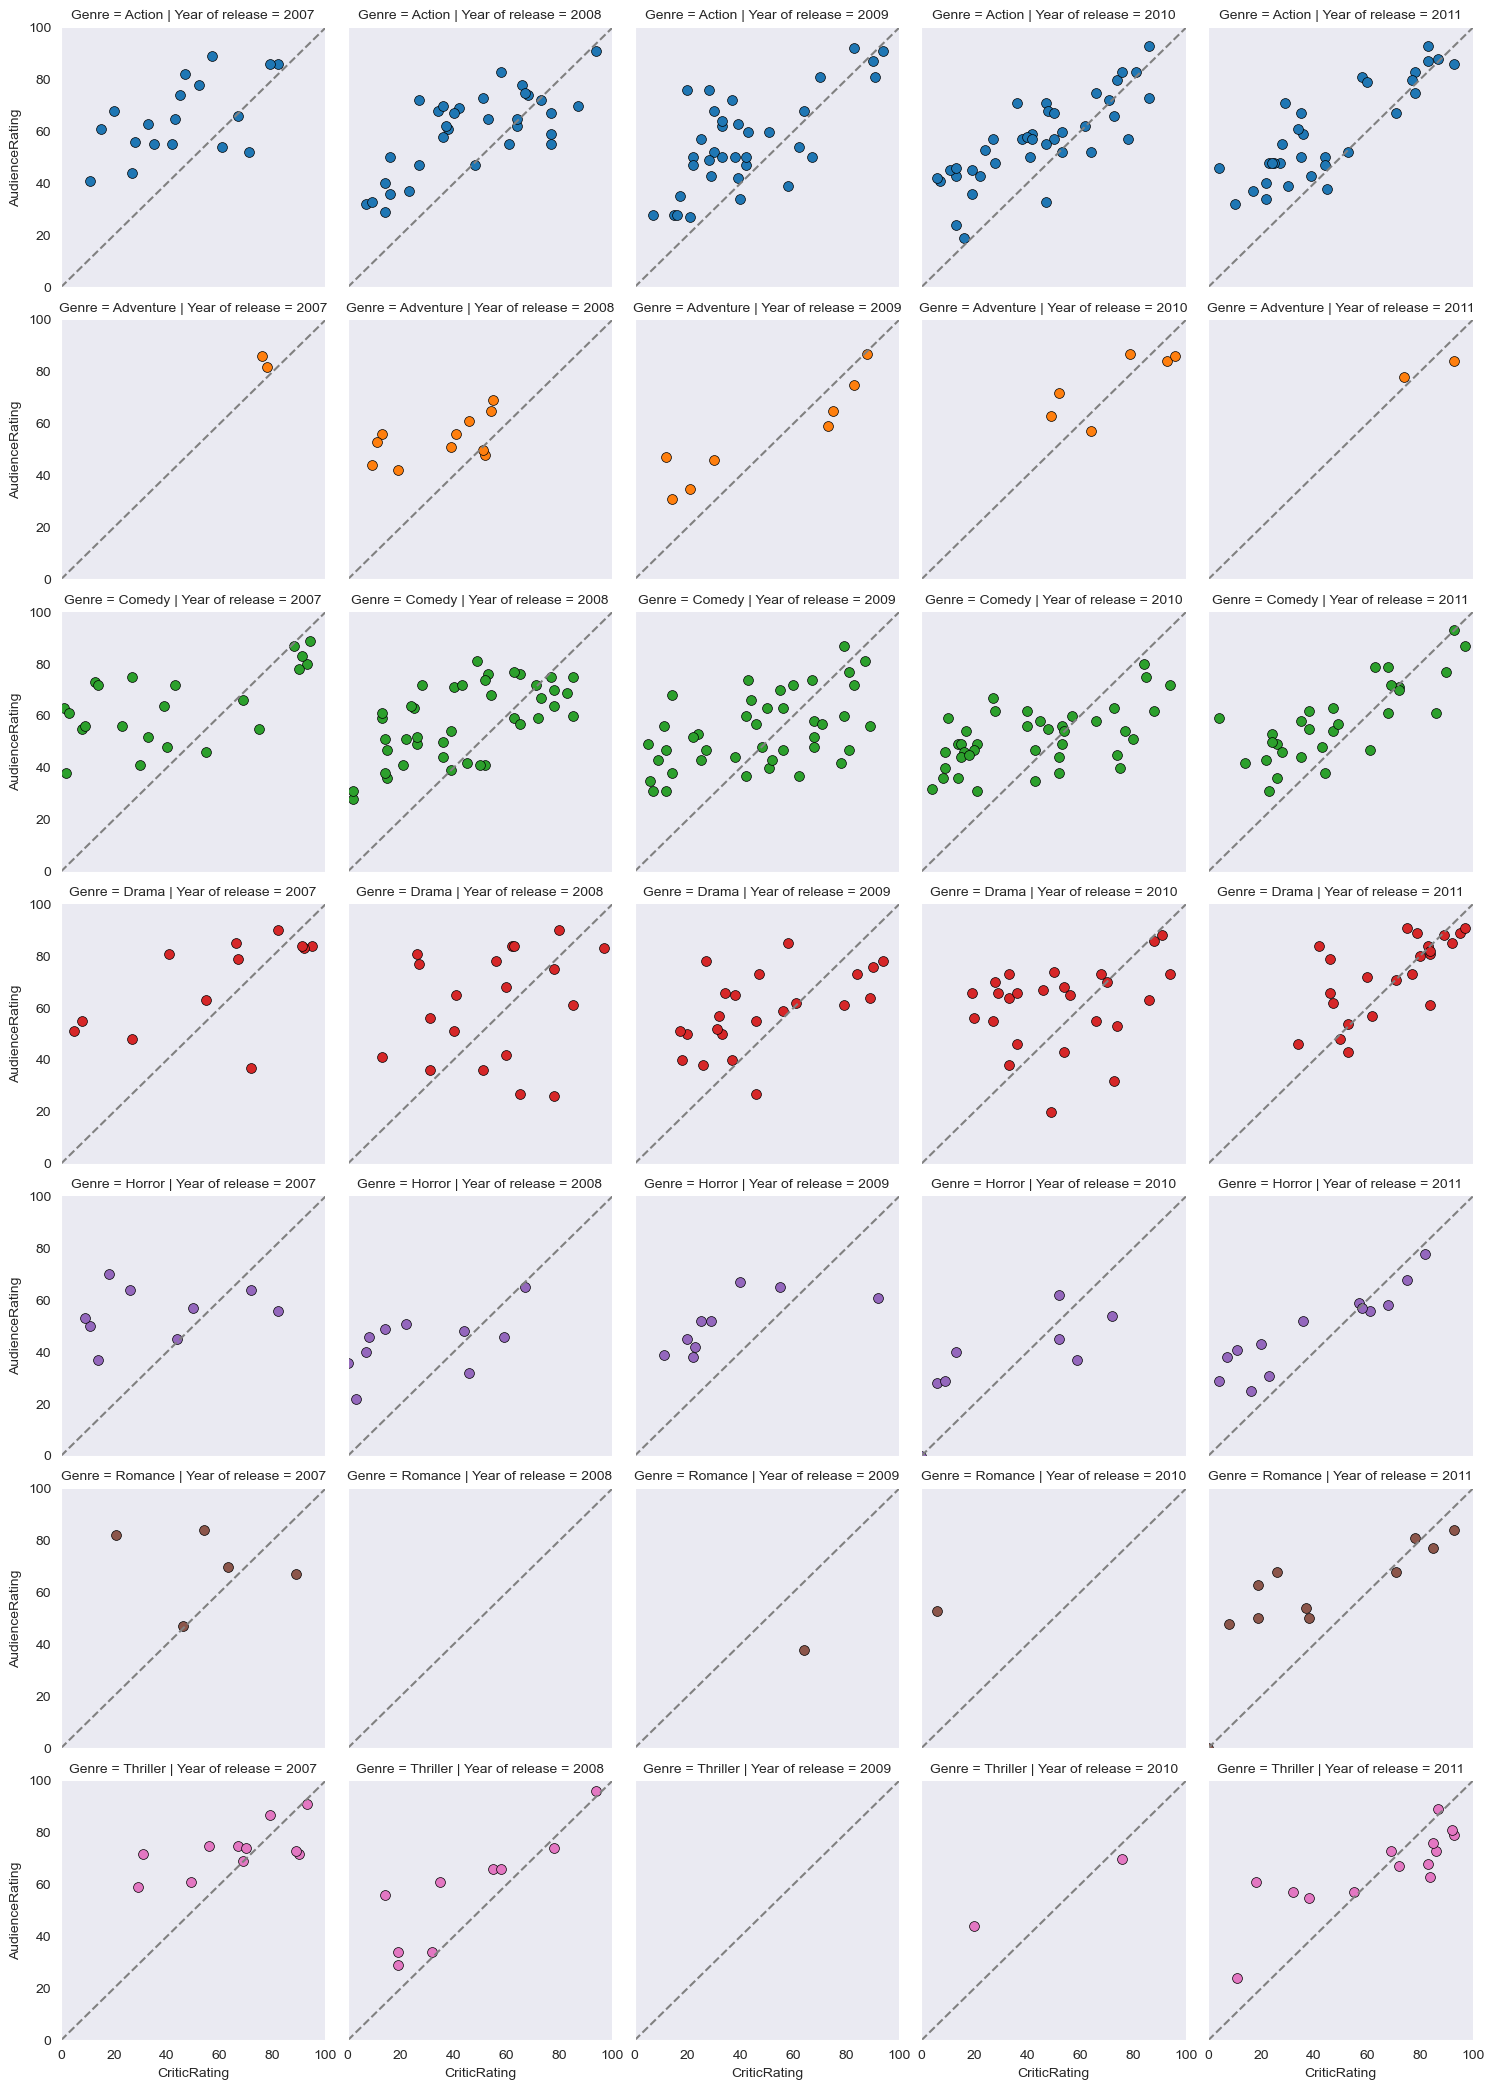

In [255]:
g = sns.FacetGrid(movies, row='Genre',col ='Year of release', hue= 'Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor ='black')
g = g.map(plt.scatter, 'CriticRating' , 'AudienceRating',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray" , ls = "--")
g.add_legend()

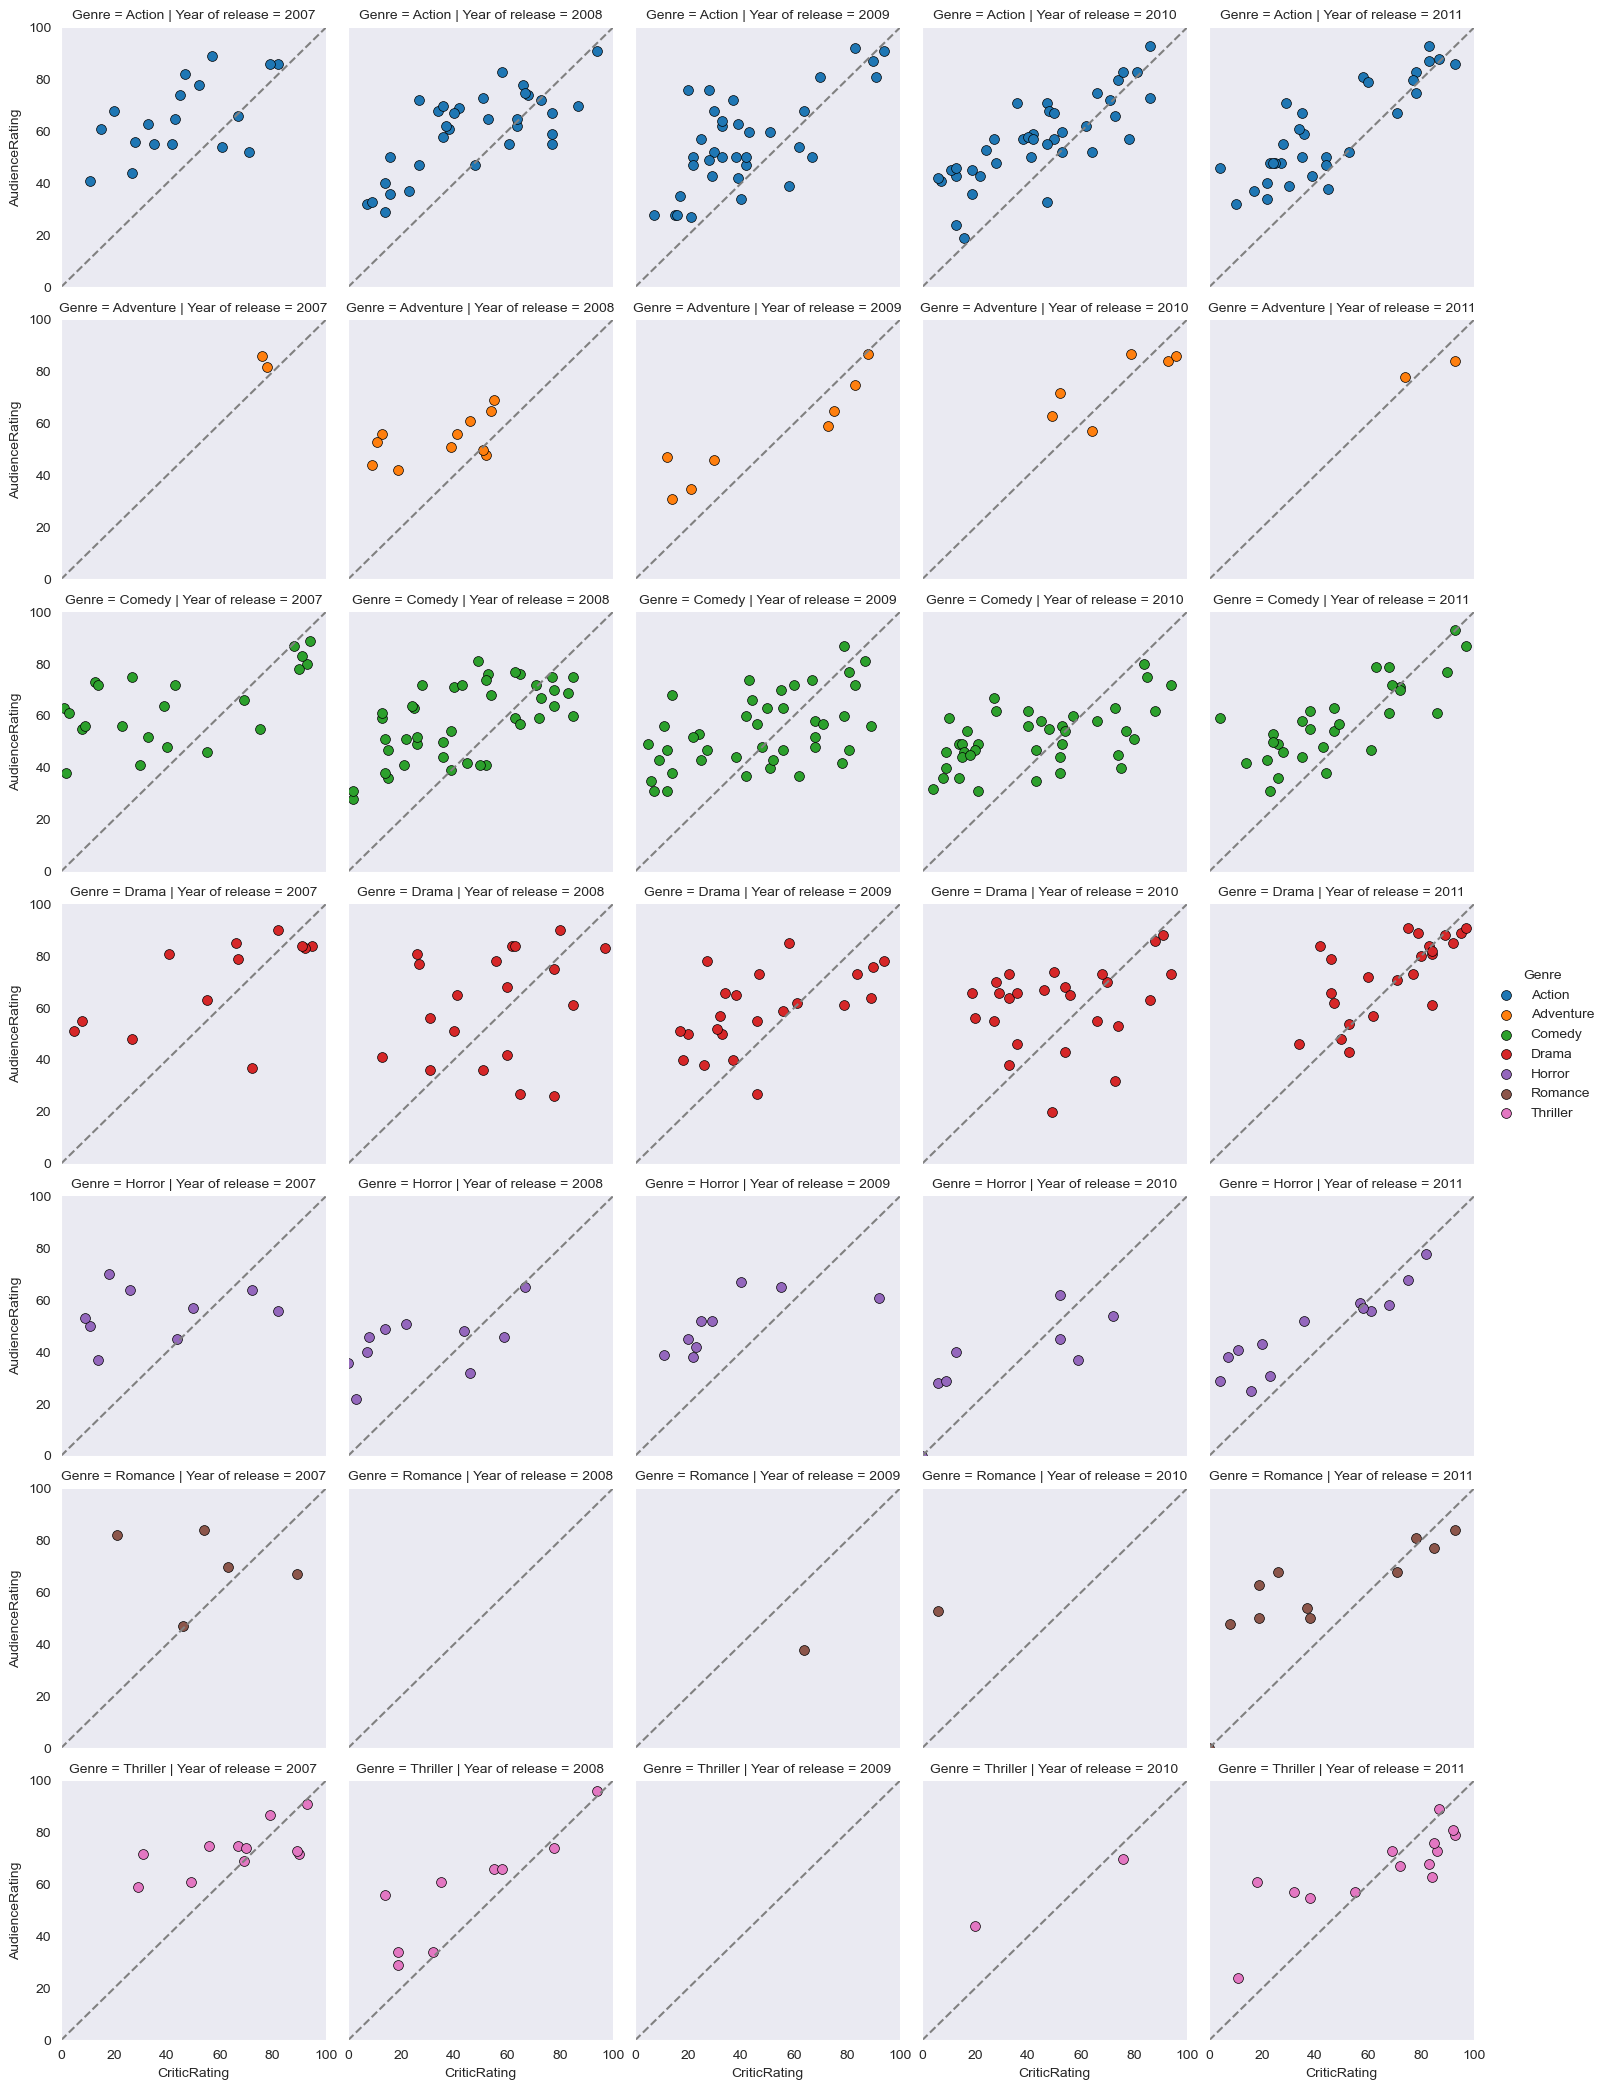

In [257]:
g = sns.FacetGrid(movies, row='Genre',col ='Year of release', hue= 'Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor ='black')
g = g.map(plt.scatter, 'CriticRating' , 'AudienceRating',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray" , ls = "--")
g.add_legend()

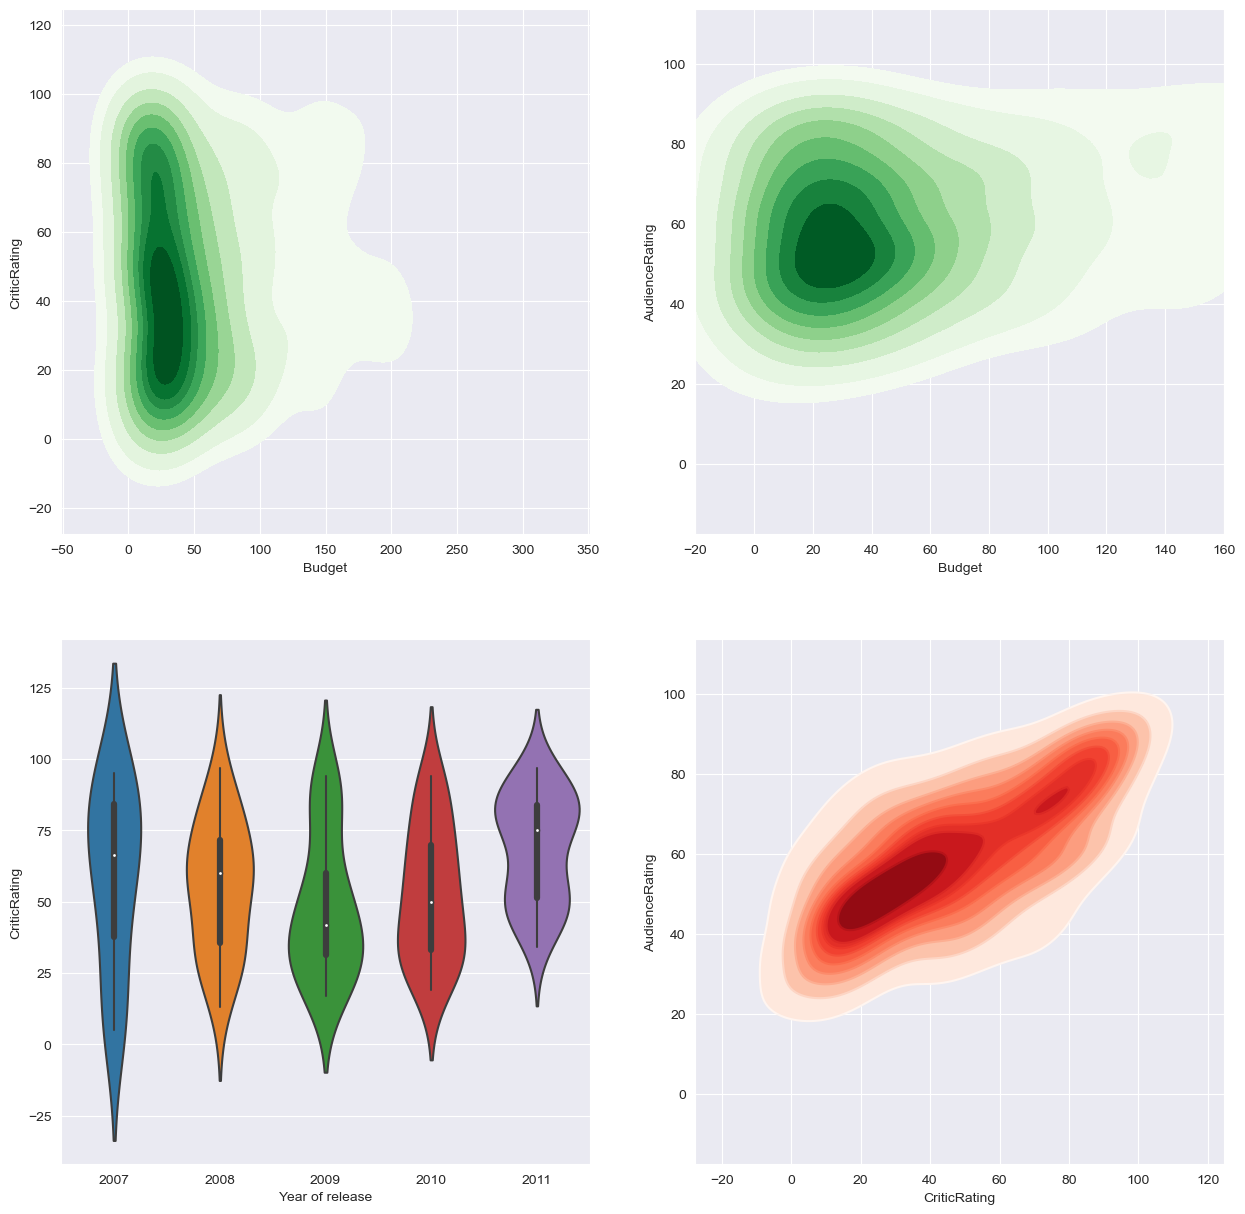

In [279]:
#extra create a dashbord
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))
k2 =sns.kdeplot(x=movies.Budget, y=movies.CriticRating, shade = True , shade_lowest = False,cmap='Greens' , ax=axes[0,0]),
k1 =sns.kdeplot(x=movies.Budget, y=movies.AudienceRating, shade = True , shade_lowest = False,cmap='Greens' , ax=axes[0,1])
k1.set(xlim=(-20,160))
x = sns.violinplot(data=movies[movies.Genre=='Drama'],
                   x= 'Year of release' , y= 'CriticRating',ax=axes[1,0])
k1a = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,
                 shade = True , shade_lowest = False,cmap='Reds' )
k1b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,cmap='Reds',ax=axes[1,1] )

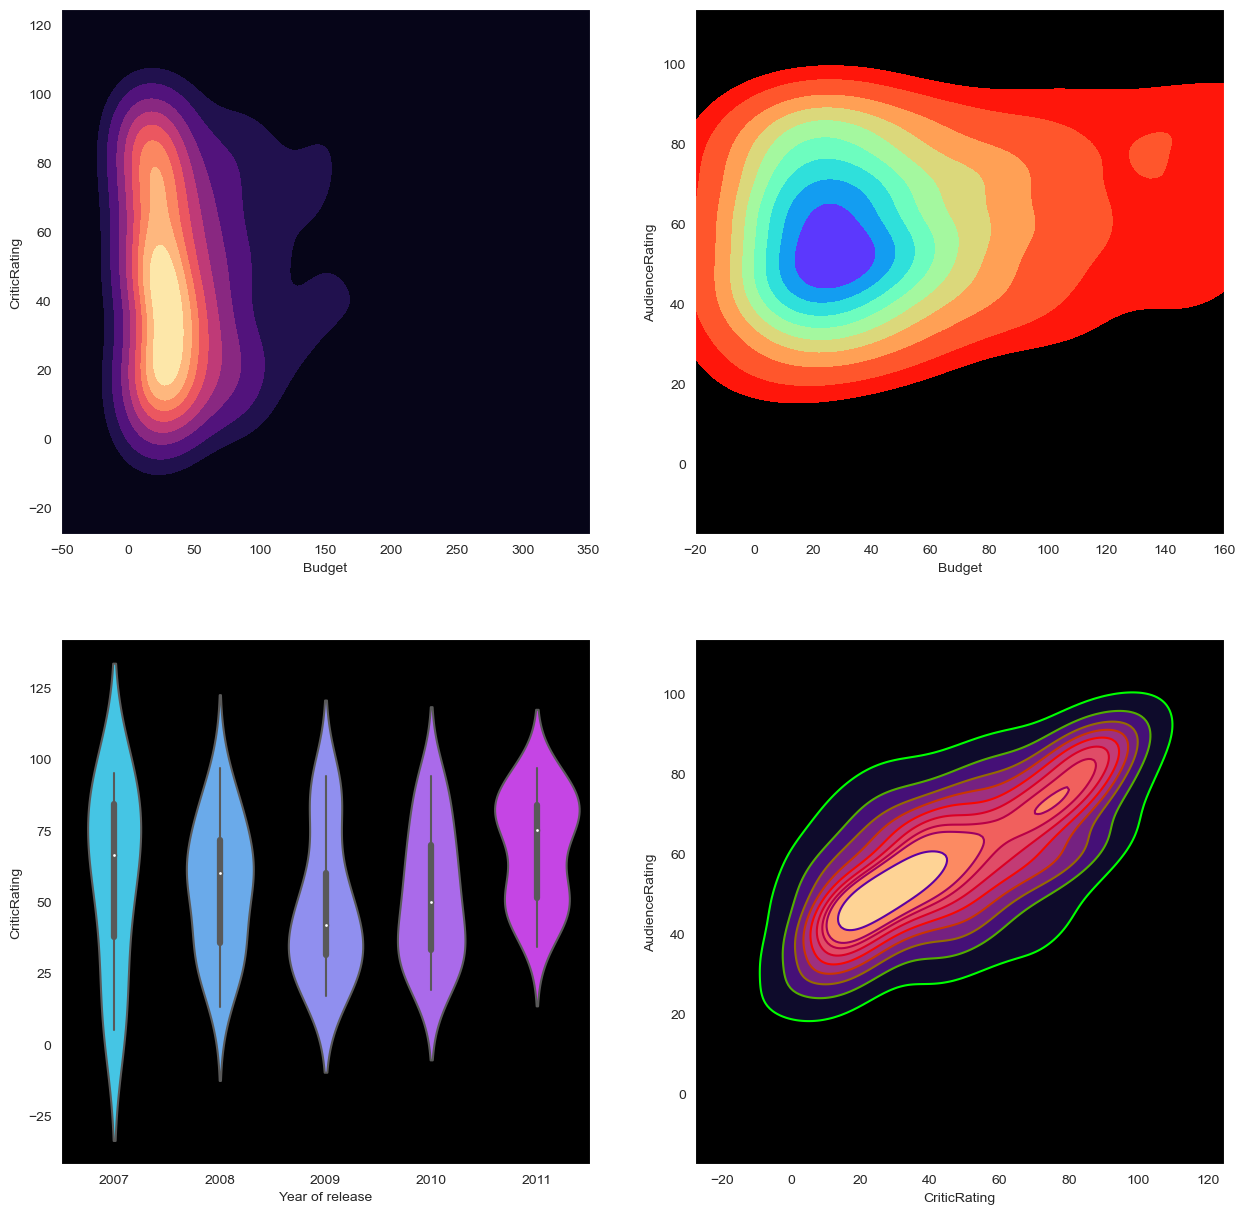

In [301]:
# styling dashbord tips
sns.set_style('dark',{"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize = (15,15))
k2 =sns.kdeplot(x=movies.Budget, y=movies.CriticRating, shade = True , shade_lowest = True ,cmap='magma' , ax=axes[0,0]),
#[0,0]
k1 =sns.kdeplot(x=movies.Budget, y=movies.AudienceRating, shade = True , shade_lowest = False,cmap='rainbow_r' , ax=axes[0,1])
#[0,1]
k1.set(xlim=(-20,160))
x = sns.violinplot(data=movies[movies.Genre=='Drama'],
                   x= 'Year of release' , y= 'CriticRating',ax=axes[1,0], palette ='cool')
#[1,0]
k1a = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,
                 shade = True , shade_lowest = False,cmap='magma' )
k1b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,cmap='brg_r',ax=axes[1,1] )
#[1,1]

---

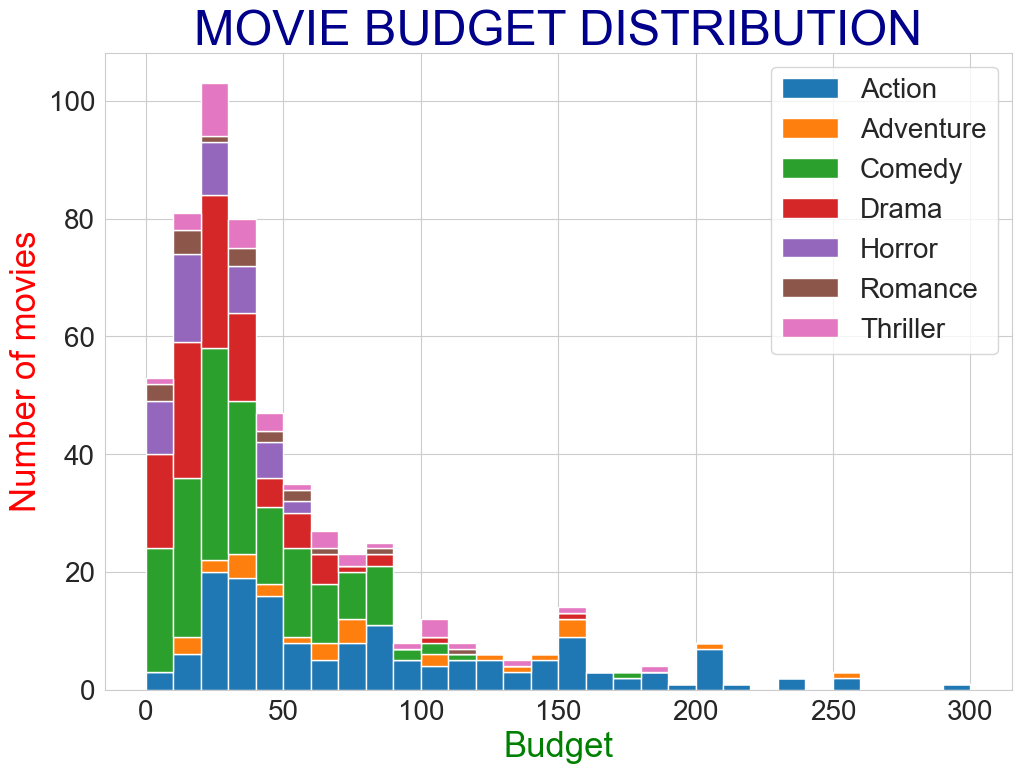

In [344]:
list1 = []
mylabels = []

for gen in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre'] == gen]['Budget'])
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title("MOVIE BUDGET DISTRIBUTION", fontsize=35,
          color="DarkBlue",)
plt.ylabel("Number of movies", fontsize=25, color="Red")
plt.xlabel("Budget", fontsize=25, color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.legend(prop={'size':20})
plt.show()

---